# Finite Difference Derivatives of Complex Exponentials

Derivatives of odd order lead to bad results when computing the Laplace equation. To get good numerical results when using Finite Difference method on equation beholding odd order derivatives, another approach must be used.

## Fourier Series
All functions can be written as a sum of complex exponentials. The complex exponential is defined as:

$$e^{j\theta} = \cos(\theta) + j\sin(\theta)$$

Adapting the complex exponential to the set of problems Maxwell's equations are able to solve, and considering only a 1 dimension for simplification, the following entity can be defined and is of utmost importance:

$$ f(x) = e^{j k x} = \cos(k x) + j\sin(k x)$$ 

where $k$ is the wave number, defined as $k = \frac{2\pi}{\lambda}$, where $\lambda$ is the wavelength. The wave number is the number of waves per unit length. This function $f$ is an harmonic function that can be used to solve wave propagation problems in any domain.

The wavenumber $k$ can be restricted to $|kh|\leq \pi$ so that any harmonic function $f$ represented in a domain with a grid spacing of $h$ remains exactly the same at any grid point when shifted by any integer multiple of $2 \pi$ inside the domain, so that $kh \ \in \ [-\pi, \pi]$.

The set of complex exponentials belonging to the family described above are eigenfunctions of the derivative operator 

$$ \frac{\partial}{\partial x} e^{j k x} = j k e^{j k x}$$


Derivative operators can be described as $D^n = \frac{f^n}{f}$, where $n$ is the order of the derivative. For the case of the defined complex exponential, the derivative operator can be written as:

$$ D_x^n e^{j k x} = \frac{\partial^n}{\partial x^n} e^{j k x} = (j k)^n e^{j k x}$$

Giving:

$$ D_x^n = (j k)^n$$


This tells us 3 things:
1. that when solving a Maxwell's equation problem, extending possible solution functions to the complex domain will allow us to solve the problem for each individual frequency that satisfies the boundary conditions of the problem,
2. that the derivative operator is a linear operator that is transformed into a multiplying coefficient when solving the equation by extending the solutions to the complex domain, greatly simplifying the problem of finding exact solutions to Maxwell's equations
3. Greater precision can be obtained for odd order derivatives once the derivative operator is transformed into a multiplying coefficient.

## Full-Grid Finite Difference application to the Derivative Operator
Considering now a grid of points $x_i$ with a spacing $h$ between them, the complex exponential can be evaluated at each point of the grid:

$$ x_i = i h, \ i \in \Zeta $$

Considering now that our aim is to discover the wave number of the solutions that satisfy the problem, which essentially means that we aim to find which monocromatic waves are present in the solution, we can extend the Finite Difference method to the complex domain:

$$ D_x = \frac{f'(x_i)}{f(x_i)} = \frac{f (x_i + h) - f (x_i - h)}{2 h f (x_i)} = \frac{e^{jkh} - e^{-jkh}}{2 h} = j \frac{\sin(kh)}{h} $$

Considering now the linearization of the derivative operator, we have that: 

$$ D_x = jk = j\frac{\sin(kh)}{h} $$

Giving the effective numerical solution of the wave number in the selected domain grid:

$$ k_{num}^{two-cell} = \frac{\sin(kh)}{h} = k \left( 1 - \frac{k^2 h^2}{6} + ... \right) $$

Notice that when applying the Finite Difference method to the Derivative operator, function $f$ was differentiated in the range of $[x_i - h; x_i + h]$, and thus this numerical solution is the solution holding a relative error of $ \epsilon = - \frac{k^2 h^2}{6} $ for a two-cell grid range. Notice that the relative error increases with decreasing wavelength of the wave $\lambda = 2 \pi / k$ and with increasing grid spacing $h$.

## Staggered Grid (or Half-Grid) Finite Difference application to the Derivative Operator
The previously presented method presents a relatively high numerical relative error. Using the staggered grid method to evaluate the derivative operator at a half step between each point of the discrete domain, this error can be further reduced when applying Finite Difference method to the complex domain:

$$ D_x = \frac{f'(x_i)}{f(x_i)} = \frac{f (x_i + h) - f (x_i)}{2 h f (x_i + h/2)} = \frac{e^{jkh/2} - e^{-jkh/2}}{h} = j \frac{2\sin(kh/2)}{h} $$

Considering now the linearization of the derivative operator, we have that: 

$$ D_x = jk = j\frac{2\sin(kh/2)}{h} $$

Giving the effective numerical solution of the wave number in the selected domain grid:

$$ k_{num}^{staggered} = 2\frac{\sin(kh/2)}{h} = k \left( 1 - \frac{k^2 h^2}{24} + ... \right) $$

Notice now that when applying the Finite Difference method to the Derivative operator, function $f$ was differentiated in the range of $[x_i; x_i + h]$, and thus this numerical solution is the solution holding a relative error of $ \epsilon = - \frac{k^2 h^2}{24} $ for a single cell grid range. This method effectively reduces the produced numerical error by a factor of 4 when compared to the previous method.

## An example: First-order propagation equation using Finite-Difference Method

$$ f' = j\lambda f, \ x > 0, \ f(0) = 1$$

Using the finite difference method to solve for f, we can observe that: 

$$ \frac{f(x_{i+1}) - f(x_{i-1})}{2h} = j \lambda f(x_i)$$

Extending the normalized problem to the complex domain, and considering the full-grid method, we can easily observe that one solution to this equation will be $f(x) = e^{jkx}$ with $k_{num}^{two-cell} = \lambda$.

Because $f$ is an harmonic function and is periodic in $[-\pi, \pi[$, two solutions can be found:

1. $k_{num}^{two-cell} = \lambda \rightarrow k_1 h = \sin ^{-1} (\lambda h )$
2. $k_{num}^{two-cell} = \lambda \rightarrow k_2 h = \pi - \sin ^{-1} (\lambda h ) = \pi - k_1 h$

## Revisiting the previous example: First-order propagation equation using Finite-Difference Method

Using now the staggered grid method for solving the 1st order equation:

$$ f' = j\lambda f, \ x > 0, \ f(0) = 1$$

We can observe that: 

$$ \frac{f(x_{i+1}) - f(x_i)}{h} = \frac{j \lambda}{2} \left[ f(x_{i+1}) + f(x_i) \right]$$

Once again, extending the normalized problem to the complex domain, and considering the full-grid method, we can easily observe that one solution to this equation will be $f(x) = e^{jkx}$ with $k_{num}^{staggered} = \lambda$.
This leads to the following relation for the numerical solution of the wave number:

$$ \lambda = 2 \frac{\sin (kh/2)}{h} $$

Because $f$ is an harmonic function and is periodic in $[-\pi, \pi[$, two solutions can be found:

1. $k_{num}^{two-cell} = \lambda \rightarrow k_1 h = 2\sin ^{-1} (\lambda h/2 )$
2. $k_{num}^{two-cell} = \lambda \rightarrow k_2 h = \pi - 2\sin ^{-1} (\lambda h/2 ) = \pi - k_1 h$

This method leads to a lower numerical error when compared to the previous method not using staggered grids. The error is defined by $\epsilon = k - k_1$, where $k$ can be analytically determined.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
# Observe relative error when using a 1st order derivative Finite Differences method:
K_MIN = 0.0
K_MAX = 1.0
MIN_EXP = 4
MAX_EXP = 14
Np = 2**MAX_EXP

# analytical solution:
kh_pi = np.linspace (K_MIN, K_MAX, Np)

# non-staggered grid solution:
k1h_pi_non_stag = np.sin(kh_pi * np.pi)/np.pi
# staggered grid solution
k1h_pi_stag = 2*np.sin(kh_pi * np.pi / 2)/np.pi

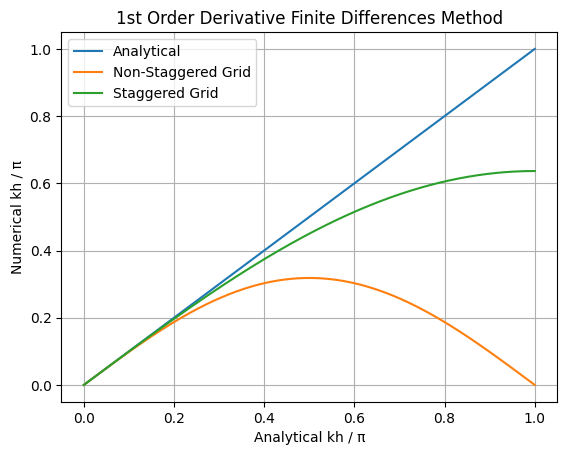

In [5]:
# Plot the normalized numerical solutions against the normalized analytical solution:
plt.plot(kh_pi, kh_pi, label="Analytical")
plt.plot(kh_pi, k1h_pi_non_stag, label="Non-Staggered Grid")
plt.plot(kh_pi, k1h_pi_stag, label="Staggered Grid")
plt.title("1st Order Derivative Finite Differences Method")
plt.xlabel("Analytical kh / π")
plt.ylabel("Numerical kh / π")
plt.legend()
plt.grid(True)

In [14]:
# Considering a staggered grid, let's obtain the value of kh for which the absolute error is less than 1%:
abs_err = np.abs(kh_pi*np.pi - k1h_pi_stag*np.pi)
target_kh = k1h_pi_stag[abs_err < (1 / 100)][-1] * np.pi
print("The target is kh < ", target_kh)
min_wavelength_h = int(np.ceil(2*np.pi / target_kh))
print("To guarantee less than 1% error, it is required at least: ", min_wavelength_h, " points per wavelength.")

The target is kh <  0.6122681445730526
To guarantee less than 1% error, it is required at least:  11  points per wavelength.


## Real life problem application

If we consider the problem of calculating the fields from a mobile telephone, at 900 MHz with λ = 33 cm, in a car of length 5 m, we see that the number of cells in one direction of the wave propagation problem domain required to get 1% phase (or frequency) error is at least 11 × 5 m / 0.33 m ≈ 167.

Of course that in a 3D simulation of a mobile phone network wave propagating in a car would require millions of cells, but the methods explored in this notebook allow us to know how to determine the minimum required number of cells in each dimension of the domain to achieve a given numerical error.

In [15]:
LIGHT_SPEED = 299792458
car_length = 5
freq = 900e6
wavelength = LIGHT_SPEED / freq
min_cell_nr = int(np.ceil(min_wavelength_h * car_length / wavelength))
print("Minimum number of domain cells in one direction to guarantee 1% error: ", min_cell_nr)

Minimum number of domain cells in one direction to guarantee 1% error:  166
